In [5]:
from scipy.interpolate import interp1d
from scipy.optimize import minimize,fmin
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

In [6]:
basiscv=['cv2z','cv3z','cv4z']
basisv=['v2z','v3z','v4z']
Method=['SCF','MP2','CCSD','CCSDT','CCSDmT','CCSDpT','FSCC01min','FSCC01ext','FSCC10']

In [7]:
BaFcv=[[-0.2787,-0.2837,-0.2829],[-0.3496,-0.3560,-0.3547],[-0.3999,-0.3980,-0.3924],[-0.3939,-0.3920,-0.3862],[-0.3982,-0.3942,-0.3874]]
BaFv=[[-0.2787,-0.2835,-0.2827],[-0.3495,-0.3559,-0.3545],[-0.3947,-0.3921,-0.3873],[-0.3894,-0.3863,-0.3812],[-0.3930,-0.3884,-0.3826]]
tab={'SCF':0,'MP2':1,'CCSD':2,'CCSD(T)':3,'FSCC(0,1)':4}
tabi={0:'SCF',1:'MP2',2:'CCSD',3:'CCSD(T)',4:'FSCC(0,1)'}
print(BaFv[tab['SCF']])

[-0.2787, -0.2835, -0.2827]


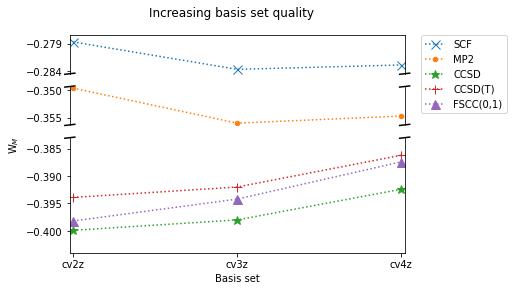

In [8]:
#PLOT WITH BROKEN Y AXIS 
f, (ax, ax3,ax2) = plt.subplots(3, 1, sharex=True, figsize=(6, 4), gridspec_kw={'height_ratios': [1,1,3]})
points=['x','.','*','+','^']
lines=[':','-.','--','-.']
# plot the same data on both axes
for i in range(len(BaFcv)):
        ax.plot(basiscv,BaFcv[i],points[i]+lines[0],label=tabi[i],markersize=9)
        ax3.plot(basiscv,BaFcv[i],points[i]+lines[0],label=tabi[i],markersize=9)
        ax2.plot(basiscv,BaFcv[i],points[i]+lines[0],label=tabi[i],markersize=9)
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
f.suptitle("Increasing basis set quality")
f.text(-0.02, 0.5, 'W$_M$', va='center', rotation='vertical')
plt.xlabel('Basis set')
#plt.ylabel('W$_M$')    

# # zoom-in / limit the view to different portions of the data
ax.set_ylim(-0.2845,-0.2775)  # outliers only
ax.set_xlim(-0.02,2.02)
ax3.set_ylim(-0.35632,-0.3493) 
ax2.set_ylim(-0.404, -0.383)  # most of the data

# hide the spines between ax and ax2
ax.spines['bottom'].set_visible(False)
ax2.spines['top'].set_visible(False)
ax3.spines['bottom'].set_visible(False)
ax3.spines['top'].set_visible(False)
ax3.tick_params(labeltop=False,    bottom=False,     
    top=False, ) 
ax.yaxis.set_ticks(np.arange(-0.284,-0.277,0.005))
ax.tick_params(labeltop=False, bottom=False, top=False)  # don't put tick labels at the top
ax2.xaxis.tick_bottom()

d = .015  # thickness of the diagonal lines in axes coordinates
# arguments to pass to plot
kwargs = dict(transform=ax.transAxes, color='k', clip_on=False)
ax.plot((-d, +d), (-d, +d), **kwargs)        # top-left diagonal
ax.plot((1 - d, 1 + d), (-d, +d), **kwargs)  # top-right diagonal

kwargs.update(transform=ax2.transAxes)  # switch to the bottom axes
ax2.plot((-d, +d), (1 - d/3, 1 + d/3), **kwargs)  # bottom-left diagonal
ax2.plot((1 - d, 1 + d), (1 - d/3, 1 + d/3), **kwargs)  # bottom-right diagonal

kwargs.update(transform=ax3.transAxes)  # switch to the bottom axes
ax3.plot((-d, +d), (1 - d, 1 + d), **kwargs)  # bottom-left diagonal
ax3.plot((1 - d, 1 + d), (1 - d, 1 + d), **kwargs)  # bottom-right diagonal
ax3.plot((-d, +d), (-d, +d), **kwargs)        # top-left diagonal
ax3.plot((1 - d, 1 + d), (-d, +d), **kwargs)  # top-right diagonal

plt.show()
f.savefig('BaFWMcv.png',bbox_inches='tight')
f.savefig('BaFWMcv.pdf',bbox_inches='tight')